In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../data_train.csv")
df.drop(columns=["Unnamed: 0"],inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,2.0,68.0,0.0,11.0,876.400000,878.0,35.336101,114.0,-0.029900,-1.100732,...,10.0,9.0,384.666667,9.777778,154.444444,354.469136,56.666667,337.777778,107.555556,321.580247
1,1.0,36.0,0.0,9.0,1139.750000,1151.0,21.643417,62.0,-0.925933,-0.793235,...,8.0,8.0,484.000000,594.000000,207.750000,12826.437500,111.500000,12803.750000,135.750000,2341.437500
2,3.0,94.0,0.0,18.0,540.941176,542.0,33.326320,192.0,-0.435777,5.230443,...,7.0,15.0,240.000000,1136.000000,65.142857,839.265306,-24.666667,1088.355556,-2.857143,195.265306
3,0.0,62.0,0.0,13.0,763.000000,769.0,167.935503,498.0,0.136019,-1.325827,...,13.0,12.0,337.333333,112.888889,198.166667,1932.305556,141.000000,2320.333333,130.166667,732.305556
4,3.0,90.0,1.0,16.0,590.933333,592.0,4.999556,18.0,-0.306220,-0.378062,...,14.0,16.0,341.857143,3841.408163,77.625000,1430.109375,-2.625000,2425.359375,145.857143,1548.836735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,0.0,78.0,0.0,19.0,534.777778,529.0,78.122806,320.0,-0.244231,-0.080893,...,16.0,6.0,284.000000,4411.200000,96.000000,1290.000000,-2.000000,1632.000000,34.500000,2705.250000
5955,1.0,66.0,1.0,10.0,1017.111111,1028.0,19.711499,50.0,-0.317728,-1.609054,...,9.0,7.0,433.428571,4055.673469,124.857143,2208.979592,-2.000000,3101.714286,94.000000,448.000000
5956,1.0,61.0,1.0,8.0,1209.142857,1214.0,11.654902,38.0,-0.495800,-0.682601,...,8.0,3.0,543.333333,355.555556,70.000000,754.666667,-46.000000,34.666667,125.500000,28.750000
5957,0.0,86.0,1.0,17.0,571.125000,547.0,108.905851,438.0,0.405227,-0.387974,...,17.0,9.0,345.000000,1230.000000,104.750000,2988.937500,12.500000,4204.750000,97.529412,1353.660900


In [17]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [19]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_scorer(clf=None,X=None, y=None,y_pred=None,y_prob=None):
    if clf != None:
        y_pred = clf.predict(X)
        y_prob = clf.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    acc_arr = []
    precision_arr = []
    recall_arr = []
    specificity_arr = []
    f1_arr = []
    for c in range(0,len(cm)):
        c = len(cm)-1
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc_arr.append((tp+tn) / (tp+fn+tn+fp))
        recall_arr.append(tp/(tp+fn))
        precision_arr.append(tp/(tp+fp))
        specificity_arr.append(tn/(tn+fp))
        f1_arr.append(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))
    return {'acc':np.nanmean(acc_arr),'precision':np.nanmean(precision_arr),'specificity':np.nanmean(specificity_arr),'recall':np.nanmean(recall_arr),'f1_score':np.nanmean(f1_arr)}

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
params = {
    'n_estimators': [10,50,100,1000],
    'learning_rate': [0.01,0.1,1,10],
    'max_depth': [3,4,5],
    'min_child_weight':[1],
    'gamma':[0,0.1,0.2],
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=10, verbose=2, return_train_score=True,refit=True)
grid_model = grid_search.fit(X,y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estima

KeyboardInterrupt: 

In [32]:
grid_model.best_params_

In [44]:
# from sklearn.metrics import ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
# def evaluation_test(y,y_pred):
#     cm = confusion_matrix(y,y_pred)
#     disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
#     disp.plot()
#     plt.show()
#     n_classes = len(cm)
#     result = []
#     for c in range(n_classes):
#         tp = cm[c,c]
#         fp = sum(cm[:,c]) - cm[c,c]
#         fn = sum(cm[c,:]) - cm[c,c]
#         tn = sum(np.delete(sum(cm)-cm[c,:],c))
#         acc = (tp+tn) / (tp+fn+tn+fp)
#         recall = tp/(tp+fn)
#         precision = tp/(tp+fp)
#         specificity = tn/(tn+fp)
#         f1_score = 2*((precision*recall)/(precision+recall))
#         if c+1 == 1:
#             Rhythm = 'AFIB'
#         elif c+1 == 2:
#             Rhythm = 'SB'
#         elif c+1 == 3:
#             Rhythm = 'SR'
#         else:
#             Rhythm = 'GSVT'
#         result.append([Rhythm,acc,recall,precision,f1_score,specificity])
#     p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
#     p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
#     p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
#     result.append(['macro avg',None,r_macro,p_macro,f_macro,None])
#     result.append(['micro avg',None,r_micro,p_micro,f_micro,None])
#     result.append(['weighted avg',None,r_weighted,p_weighted,f_weighted,None])
#     return result
        

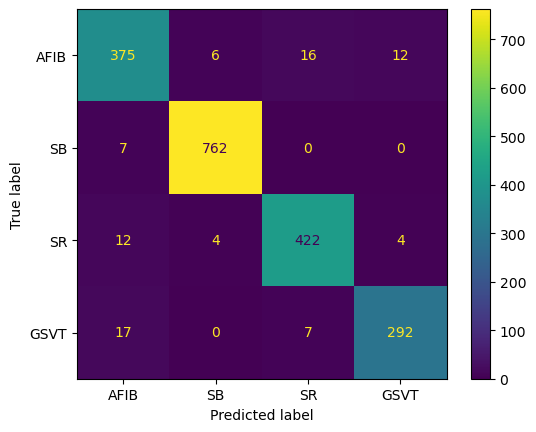

,Rhythm Group,ACC,Recall,Precision,F1-score,specificity
0,AFIB,0.963843,0.916870,0.912409,0.914634,0.976424
1,SB,0.991219,0.990897,0.987047,0.988968,0.991431
2,SR,0.977789,0.954751,0.948315,0.951522,0.984605
3,GSVT,0.979339,0.924051,0.948052,0.935897,0.990123
4,macro avg,NaN,0.946642,0.948955,0.947755,NaN
5,micro avg,NaN,0.956095,0.956095,0.956095,NaN
6,weighted avg,NaN,0.956095,0.956071,0.956053,NaN


In [45]:
# evaluation_test = evaluation_test(y_test,result_test)
# df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","Recall","Precision","F1-score","specificity"])
# df_evaluation_test

In [47]:
# df_evaluation_test.to_csv("../Result/XGB_12_lead_test_mean.csv")